# Wine Quality
< General explanation about project here >

## Explanation of data features
### Acids 
- Major wine constituents and contribute greatly to its taste
- Impart the sourness or tartness that is a fundamental feature in wine taste
- Affects pH, color and stability to oxidation (lifespan)
- Arises in grapes or as part of fermentation
- Cool climate: high acidity from grapes, sour
- Warm climate: low acidity from grapes, less sour
- Can mask sweetness of wine
- Divided in two group: fixed and volatile<br>

**1. Fixed Acidity:** 
- Nonvolatile acid in wine 
- Predominantly tartaric, malic, citric and succinic acids

**2. Volatile Acidity:** 
- Primarily acetic acid but also lactic, formic, butyric and propionic acids
- Not desirable, bad contribution to taste!

**3. Citric Acid:** 
- Part of the fixed acids
- Often added to finished wine to increase sourness and give "fresh" flavor
- High level increases growth of unwanted microbes and volatile acids<br>

### Sugar 
- Essential part of fermentation
- Sugar in grapes is broken down by yeast into alcohol and carbon dioxide <br>

**4. Residual Sugar:**
- Sugar that resides in wine after fermentation
- Influences how sweet a wine will taste
- Levels can vary highly (1-450 g/L)
- Wines with >45g/L are considered sweet<br>

### Chloride 
**5. Chlorides:** 
- One of the amounts that makes up table salt
- Contributes to saltiness of wine
- Concentration highly depended on region
- Masks acidity<br>

### Sulfur Dioxide 
- Natural byproduct of the fermentation process
- Acts as preservative protecting juice and wine from oxidation, microbes and bacteria
- Is added during wine making process
- The lower the Ph and the higher the alcohol, the less sulfur is added
- Has almost no effect on taste since it is added in marginal portions
- Bears risk for health if added in greater protions<br>

**6. Free Sulfur Dioxide:**
- "Buffer" against microbes and bacteria<br>

**7. Total Sulfur Dioxide:**
- Free + bound Sulfur Dioxide
- Bound Sulfur Dioxide already worked as "Buffer" but is still present in the wine<br>

### Further Features 
**8. Density:** 
- Primarily determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids
- Contributes to the wine's mouthfeel<br>

**9. pH:** 
- How acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- Most wines are between 3-4 on the pH scale
- Depends on the grape's harvesting time
- Strong indicator for sourness of wine<br>

**10. Sulphates:** 
- Salts of sulfuric acid
- Wine additive which can contribute to sulfur dioxide levels<br>

**11. Alcohol:**
- Level decides how balanced a wine tastes<br>

In [13]:
############### Import libraries ###############

# math library
import numpy as np
import io
import tensorflow as tf
import pandas as pd
import sklearn.linear_model as lm
import urllib.request as ur
import scipy.io as sio
from scipy.io import loadmat
from scipy.io import savemat
from scipy.stats import zscore 
from sklearn import model_selection, tree
from scipy import stats
from scipy.linalg import svd
from sklearn.neighbors import NearestNeighbors
from scipy.stats.kde import gaussian_kde


# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.pyplot import (figure, hold, subplot, plot, xlabel, ylabel, 
                               xticks, yticks,legend,show,title, imshow, cm, colorbar, bar)

# machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 3d visualization
#from mpl_toolkits.mplot3d import axes3d

# computational time
import time

In [2]:
############### Loading & Normalizing Data ###############

# Saving URLs
url_white='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
url_red='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Retrieve URLs and save content in variables
data_white = np.genfromtxt(ur.urlretrieve(url_white)[0], delimiter=';')
data_white = data_white[1:,:]
savemat('data_white.mat',mdict={'data_white':data_white})
data_red = np.genfromtxt(ur.urlretrieve(url_red)[0], delimiter=';')
data_red = data_red[1:,:]
savemat('data_red.mat',mdict={'data_red':data_red})

# Add feature 13 of red/white and combine data sets, 0=white, 1=red
a_white=np.zeros((data_white.shape[0],data_white.shape[1]+1))
a_white[:,0:12]=data_white

b_red=np.ones((data_red.shape[0],data_red.shape[1]+1))
b_red[:,0:12]=data_red

data_both=np.concatenate((b_red,a_white))

# data normalization (manually)
data_both_norm=data_both

for i in range(0,data_both.shape[1]-2):
  mean=np.mean(data_both[:,i])
  var=np.var(data_both[:,i])
  for j in range(0,data_both_norm.shape[0]):
    data_both_norm[j,i]=(data_both[j,i]-mean)/np.sqrt(var)
    
for i in range(0,data_both_norm.shape[1]-2):
  mean=np.mean(data_both_norm[:,i])
  
for i in range(0,data_both_norm.shape[1]-2):
  var=np.var(data_both_norm[:,i])

data_both=np.concatenate((b_red,a_white))
data_white_norm=data_both_norm[(data_both[:,12]==0)]
data_red_norm=data_both_norm[(data_both[:,12]==1)]

#HAVE A LOOK AT THIS 
#data = pd.read_csv('', sep =',')
#print('Number of training data =', data.shape)

# -->
# Read file into a Pandas dataframe
#from pandas import DataFrame, read_csv
#f = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
#df = read_csv(f)
#df=df[0:10]
#df


## Data visualisation 
### Explanation
The goal for this section is the to visualize and disseminate the data in order to discover new patterns or relationships in the data.
A histogram is one of the most commen visualization toolse construct the histogram in two steps. The first step is to divide the entire range of value of the variable into a series of intervals, most often of equal length. We then count how many observations in the dataset fall within each such bin and draw a rectangle where the base of the rectangle is the interval and the height is the number of observations that fall into the rectangle. That is, the sum of the height of all rectangles will be the number of observations. This procedure is also known as binning.

#### Histograms
- The attributes x_1–x_12 are standardized (i.e., the mean has been subtracted each attribute and the attributes divided by their standard deviations). In figure 1 a boxplot of the standardized data is given. 
- The boxplot reveals that there are clearly some outliers in the Volatile acidity, Density, and Alcohol attributes, i.e. attribute number 2, 8 and 11. 

#### Boxplot
A way to summarize a histogram is the box plot. The middle red line corresponds to the median (the p = 0.5 percentile), the upper and lower bounds, l_{75} and l_{25}, of the blue box is the p = 0.75 and 0.25 percentile, the black lines are known as the whiskers and attempt to outline how wide the distribution is. The whiskers tell us essentially the spred of all of the data. The lowest data point will be *** and the highest datapoint will be *** The range will be the two numbers subtracted. 

ISUES: 
- Are there issues with outliers in the data?
- Do the attributes appear to be normal distributed?
- Are variables correlated?
- Make a scatterplot of the two attribute with the largest standard deviation? 
- Principal component (Variance)

In [ ]:
############### Data Visualization ###############

#Boxplot
print('Boxplot:')
attributeNames = ['Fixed acidity','Volatile acidity','Citric acid','Residual sugar','Chlorides','Free sulfur dioxide','Total sulfur dioxide','Density','pH','Sulphates','Alcohol','Quality score (0--10)']
figure(figsize=(12,6))
title('Wine: Boxplot')
pp = plt.boxplot((data_both_norm[:,:-1]), notch=0, sym='+', vert=1, whis=1.5)
plt.setp(pp['fliers'], marker='+')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-5,40))
plt.xticks(np.arange(1,13,step=1),attributeNames,rotation=-40,ha='left')
show()

#Histograms
print('Histograms:')

figure(figsize=(18,9))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.hist(data_both[:,i])
    plt.title(attributeNames[i])
show()

#Selected Histograms
print('Close Up os Selected Histograms and Scatterplots:')
figure(figsize=(18,9))
m = [1, 7, 10]
for i in range(len(m)):
  subplot(1,len(m),i+1)
  plt.hist(data_both[:,m[i]])
  plt.title(attributeNames[m[i]])
  
#Scatter plots feature on quality
i = 0
j = 11
figure(figsize=(18,9))
for i in range(12):
  plt.subplot(2,6,i+1)
  plot(data_both[:, i], data_both[:, j], 'o')
  plt.xlabel(attributeNames[i])
  plt.ylabel(attributeNames[j])

## Hyperparameter Estimation
< Description here >

### Classification and regression

In supervised learning we are given a training set comprised of N observations, x1,...,xN and N targets y1,...,yN and we wish to come up with a way to predict y from x:

y = f (x, w) + epsilon

where w is a vector of tunable parameters and epsilon represents a noise term. Learning then consists of selecting the parameters w based on the training data X,y. If y is a continuous parameter, for instance the price of a stock, we will say that the model (denoted M) is a regression model. On the other hand if y is discrete, i.e. y = 1,2,...,C we will say M is a classification model. 

#### Linear models 

Despite having different goals, linear and logistic regression are closely related by virtue of using a linear transformation of the input features which will be our natural starting point. Recall in a linear model, the output y in eq. (y=f(x,w) + epsilon) is modelled as a linear combination of the input features:

f(x,y) = w0+w1x1 + ...wMxM,   and   x = [x1,x2,...xM]

### Overfitting and performance evaluation

For some practitioners of machine learning the most interesting aspect is devising new and exciting algorithms and words such as “evaluation” or “testing” is likely to be treated as an afterthought. However, testing and quantifying the performance of machine-learning methods is possibly the most important aspect of data modelling.
Suppose we are in a situation where we has S different models M1, . . . , MS that each tries to solve a particular supervised learning problem. Without an objective way of comparing the models we will not know which to choose. Sure, we might feel we should select model MS which is the most complicated of the models, but that is not an objective justification. Worse yet, if we are working in a company, it will be impossible to quantify if progress is being made at solving the problem or if there is any benefits for the company to have a machine learning department at all.


#### Cross validation
The principal way of comparing and validating models is by cross-validation. In this chapter, we will introduce the reasoning behind cross-validation and discuss important applications of cross- validation. The basic setup for cross-validation is as follows: We consider a supervised learning problem with a data set D = (X,y). It is important to keep in mind the dataset is finite and this is all the
data we have. As in the regression example, we consider different models for solving the problem,
M1 ,M2 ,...,MS and for each of these models we have access to a loss function L(y_i ,y_^i) which quantifies the error of predicting yˆ when the true value is y . In the regression example the loss ii function was the least square error L(y , yˆ ) = ||y_i-y_^i||^2, but in general the loss function will be defined according to the specific modeling purpose.

#### Traning and test error 
If the data is divided into a training set and a test set D^train and D^test and the model M is fitted on the training set to provide the prediction rule f_M then we define the training and test errors as:

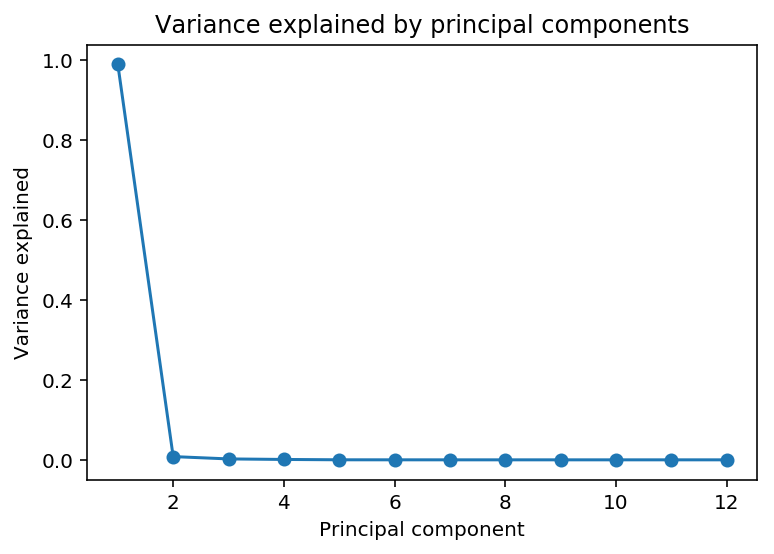

In [7]:
############### Principal Component Analysis ###############

# Subtract mean value from data
Y = data_both[:,:-1] - np.mean(data_both[:,:-1])/np.std(data_both[:,:-1])

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Plot variance explained
figure()
plot(range(1,len(rho)+1),rho,'o-')
title('Variance explained by principal components');
xlabel('Principal component');
ylabel('Variance explained');
show()

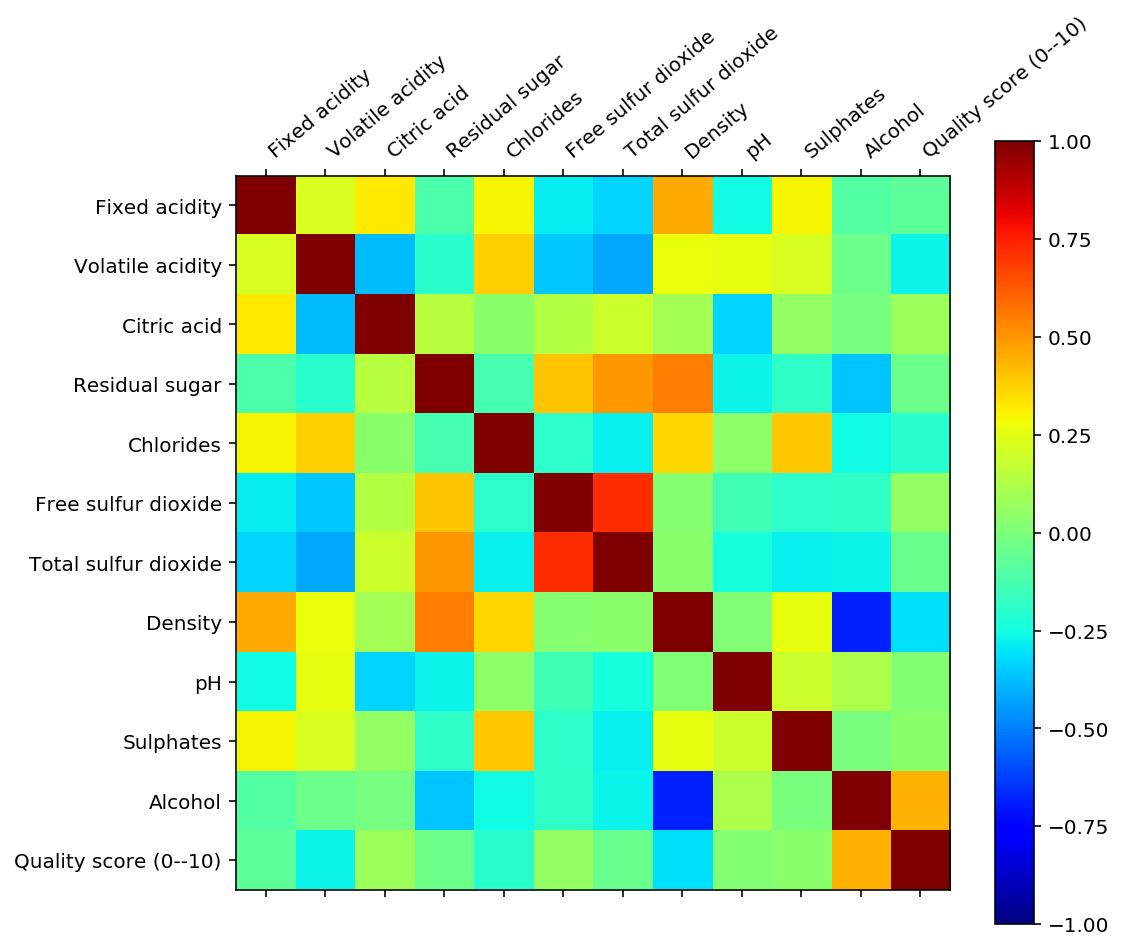

In [9]:
############### Correlation Matrix ###############

df = pd.DataFrame(data=data_both_norm[:,:-1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1,cmap=cm.jet) # 'gray' for non epilleptic color scheme
fig.colorbar(cax,shrink=0.9)
plt.xticks(np.arange(0,12,step=1),attributeNames,rotation=+40,ha='left')
plt.yticks(np.arange(0,12,step=1),attributeNames,rotation=+0,ha='right')
show()

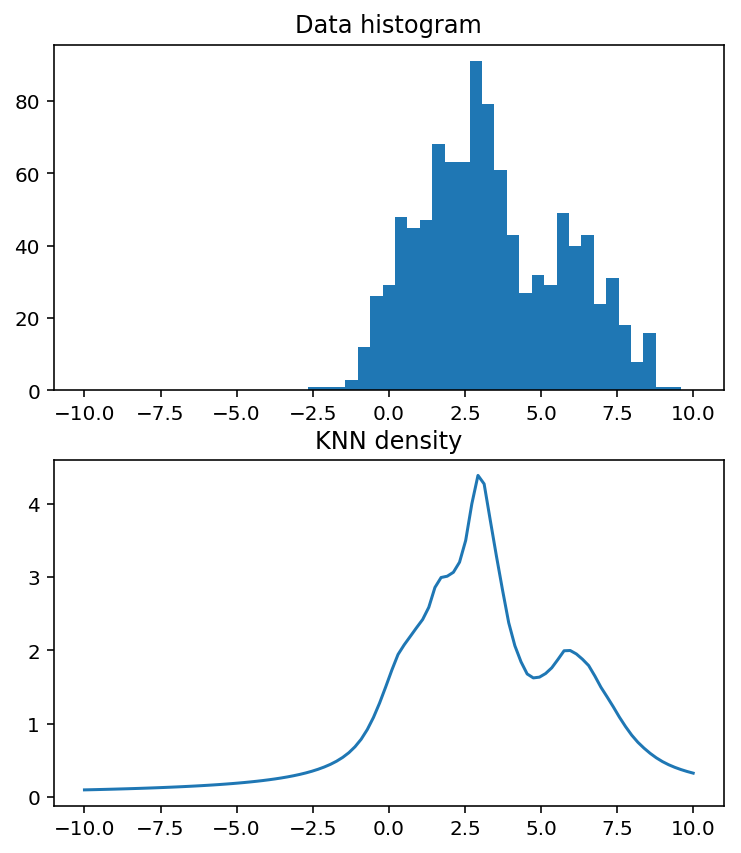

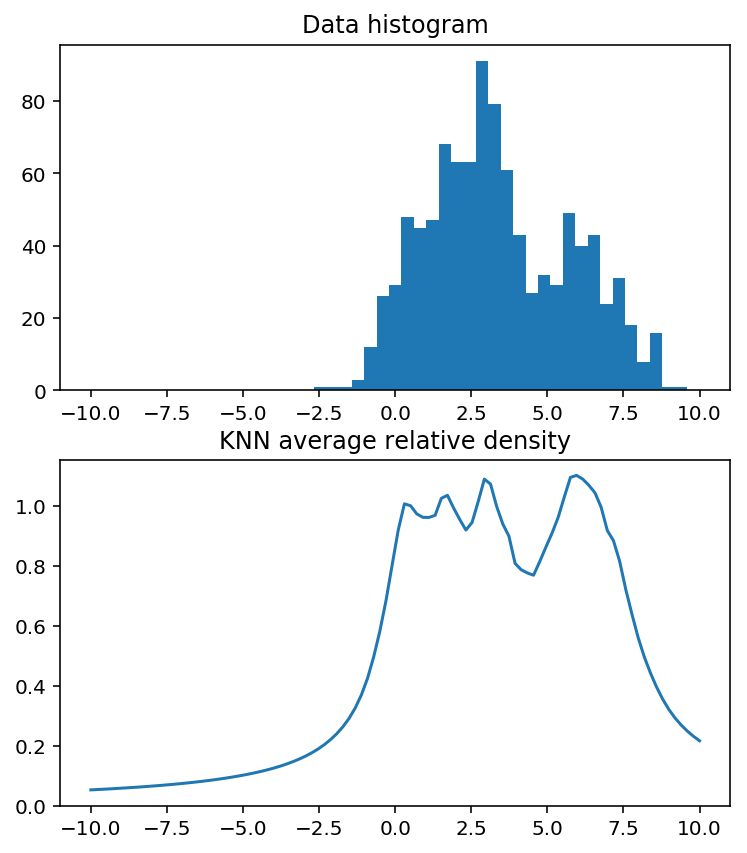

The index of the lowest density object: 75


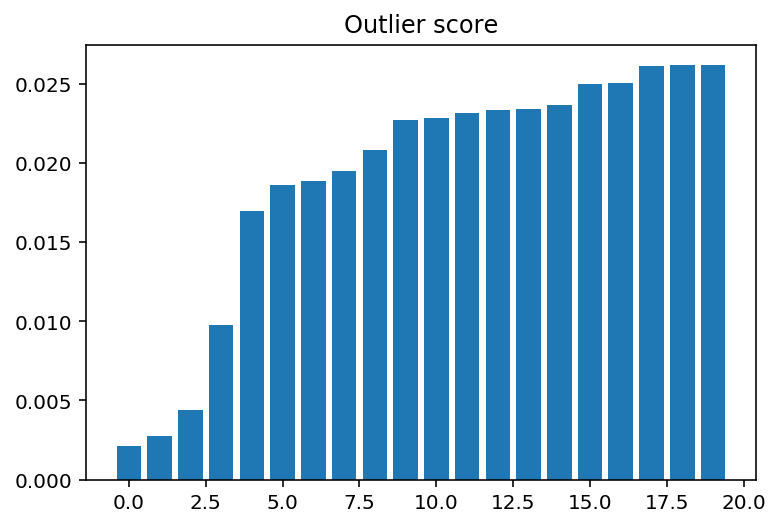

In [10]:
############### K Nearest Neighbors ###############

N = 1000; M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
#plot(X.shape)
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])

c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))

# Number of neighbors
K = 200

# x-values to evaluate the KNN
xe = np.linspace(-10, 10, 100)

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(np.matrix(xe).T)

# Compute the density
knn_density = 1./(D.sum(axis=1)/K)

# Compute the average relative density
DX, iX = knn.kneighbors(X)
knn_densityX = 1./(DX[:,1:].sum(axis=1)/K)
knn_avg_rel_density = knn_density/(knn_densityX[i[:,1:]].sum(axis=1)/K)

# Plot KNN density
figure(figsize=(6,7))
subplot(2,1,1)
plt.hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, knn_density)
title('KNN density')
# Plot KNN average relative density
figure(figsize=(6,7))
subplot(2,1,1)
plt.hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, knn_avg_rel_density)
title('KNN average relative density')
show()

# Compute kernel density estimate
kde = gaussian_kde(X.ravel())
scores = kde.evaluate(X.ravel())
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0]))

# Plot kernel density estimate
figure()
bar(range(20),scores[:20])
title('Outlier score')
show()

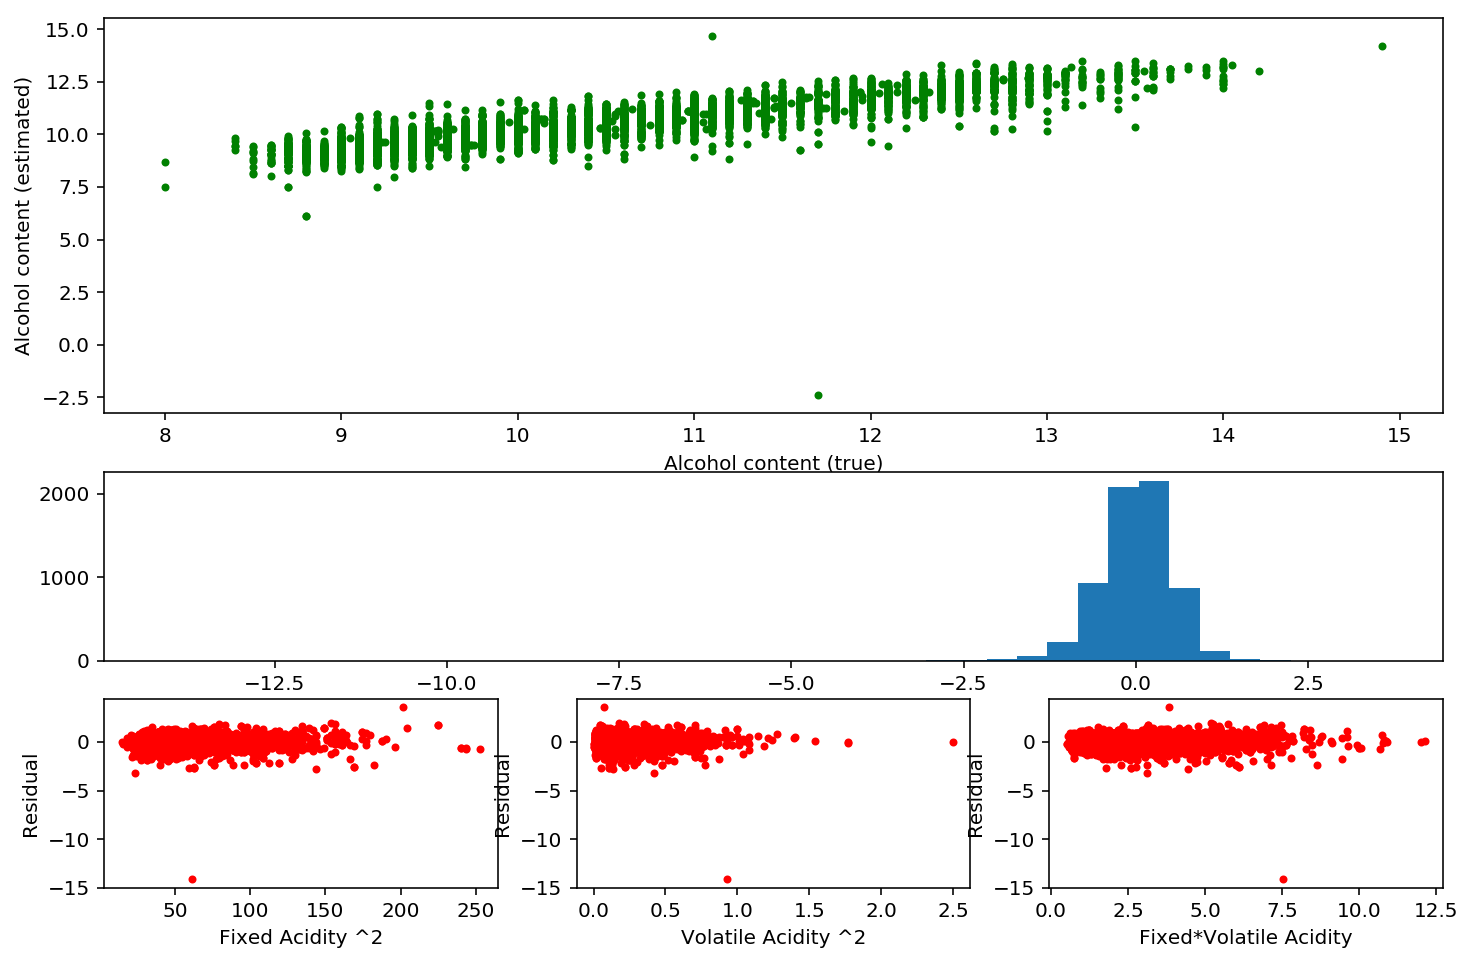

In [11]:
############### ??? ###############

# Split dataset into features and target vector
# Remove attribute 12 (Quality score)
data_both = data_both[:,0:11]
attributeNames = attributeNames[0:11]

alcohol_idx = attributeNames.index('Alcohol')
y = data_both[:,alcohol_idx]

X_cols = list(range(0,alcohol_idx)) + list(range(alcohol_idx+1,len(attributeNames)))
X = data_both[:,X_cols]

# Additional nonlinear attributes
fa_idx = attributeNames.index('Fixed acidity')
va_idx = attributeNames.index('Volatile acidity')
Xfa2 = np.power(X[:,fa_idx],2).reshape(-1,1)
Xva2 = np.power(X[:,va_idx],2).reshape(-1,1)
Xfava = (X[:,fa_idx]*X[:,va_idx]).reshape(-1,1)
X = np.asarray(np.bmat('X, Xfa2, Xva2, Xfava'))

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display plots
figure(figsize=(12,8))

subplot(2,1,1)
plot(y, y_est, '.g')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)')

subplot(4,1,3)
plt.hist(residual,40)

subplot(4,3,10)
plot(Xfa2, residual, '.r')
xlabel('Fixed Acidity ^2'); ylabel('Residual')

subplot(4,3,11)
plot(Xva2, residual, '.r')
xlabel('Volatile Acidity ^2'); ylabel('Residual')

subplot(4,3,12)
plot(Xfava, residual, '.r')
xlabel('Fixed*Volatile Acidity'); ylabel('Residual')
show()

In [17]:
############### Minimize Regression Loss on Small Dataset ###############

data_both_norm_shuf=data_both_norm
np.random.shuffle(data_both_norm_shuf)

data_train_small=data_both_norm_shuf[0:240,:-1]
data_val_small=data_both_norm_shuf[240:300,:-1]

# regression functions
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) )
    return loss

def f_pred(X,w): 
    p = sigmoid(X.dot(w))
    return p

def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z))
    return sigmoid_f

d = 1
poly = PolynomialFeatures(d, interaction_only=False)
train_X = poly.fit_transform(data_train_small[:,0:11])
print(train_X.shape)


# regression loss with scikit-learn
logreg_sklearn = LinearRegression() # scikit-learn logistic regression
#print(logreg_sklearn)
logreg_sklearn.fit(train_X[:,1:], data_train_small[:,11]) # learn the model parameters

w_sklearn = np.zeros([train_X.shape[1],1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:train_X.shape[1],0] = logreg_sklearn.coef_
print(w_sklearn.shape)
loss_sklearn = loss_logreg(f_pred(train_X,w_sklearn),data_train_small[:,11][:,None])
print('loss sklearn=',loss_sklearn)

(240, 12)
(12, 1)
loss sklearn= [[-28.99269871]]
